## Lab 1
Jupyter is an interactive, web-based python interface. Jupyter is a great tool for data-science, since you can iteratively develop your project and debug your code without having to continually reload data into memory. To run each cell of the jupyter notebook, use  $\texttt{ctrl+enter}$. In addition to jupyter, three python packages are used in this notebook: numpy (to perform computations + sampling), pandas (to clean the data), and matplotlib (to plot the data) 


### Learning Objectives
- Use descriptive statistics to quantify the basic features of data
- Use bootstrapping to determine the probability of a given observation in a non-normal dataset
- Understand what a p-value means with respect to the tested hypothesis.


In [5]:
# Step 0: import python packages 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [6]:
# Step 1: Load in + clean the data

# load in data for the entire population
data = (pd.read_csv("Data/oasis_cross-sectional.csv")
        .dropna(axis=0, subset=["CDR", "nWBV"])) # drop the participants without a clinical dementia rating

# isolate participants with nonzero clinical dementia rating
dementia_data = data.loc[data.CDR > 0, :]

# isolate general population (healthy participants)
healthy_data = data.loc[data.CDR == 0.0, :]

#print some of the data
print("Sample of dementia data:")
print(dementia_data.head(), "\n")

print("Sample of healthy data:")
print(healthy_data.head(), "\n")


Sample of dementia data:
               ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
2   OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
13  OAS1_0015_MR1   M    R   76   2.0  NaN  28.0  0.5  1738  0.719  1.010   
14  OAS1_0016_MR1   M    R   82   2.0  4.0  27.0  0.5  1477  0.739  1.188   
19  OAS1_0021_MR1   F    R   80   3.0  3.0  23.0  0.5  1794  0.765  0.978   
20  OAS1_0022_MR1   F    R   69   2.0  4.0  23.0  0.5  1447  0.757  1.213   

    Delay  
2     NaN  
13    NaN  
14    NaN  
19    NaN  
20    NaN   

Sample of healthy data:
               ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0   OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1   OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
8   OAS1_0010_MR1   M    R   74   5.0  2.0  30.0  0.0  1636  0.689  1.073   
9   OAS1_0011_MR1   F    R   52   3.0  2.0  30.0  0.0  1321  0.827  1.329   
11  OAS1_0013_MR1   F    R   

Mean nWBV for the healthy population: 0.769
Mean nWBV for the dementia patients: 0.722

Median nWBV for the healthy population: 0.773
Median nWBV for the dementia patients: 0.722

Stdev of nWBV for the healthy population: 0.046
Stdev of nWBV for the dementia patients: 0.036

Min nWBV for the healthy population: 0.645
Min nWBV for the dementia patients: 0.644

Max nWBV for the healthy population: 0.847
Max nWBV for the dementia patients: 0.797

Range of nWBV for the healthy population: 0.202
Range of nWBV for the dementia patients: 0.153

Count nWBV for the healthy population: 135.000
Count nWBV for the dementia patients: 100.000



Text(0, 0.5, 'Count')

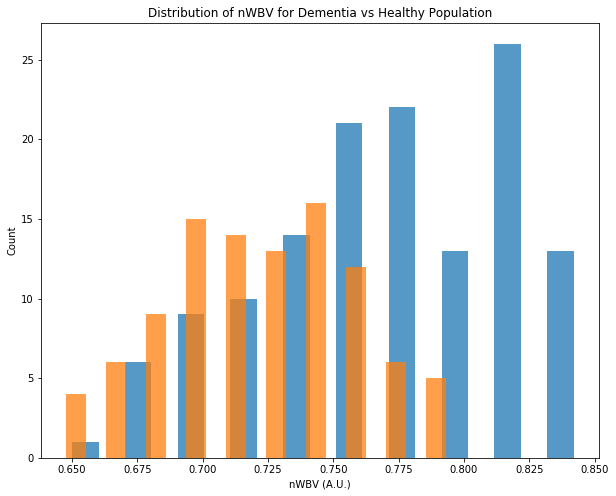

In [7]:
# Step 2: Basic Stats + Plotting in Python
# Mean
print("Mean nWBV for the healthy population: %.3f" % (healthy_data["nWBV"].mean()))
print("Mean nWBV for the dementia patients: %.3f\n" % (dementia_data["nWBV"].mean()))

# Median
print("Median nWBV for the healthy population: %.3f" % (healthy_data["nWBV"].median()))
print("Median nWBV for the dementia patients: %.3f\n" % (dementia_data["nWBV"].median()))

# Standard Deviation
print("Stdev of nWBV for the healthy population: %.3f" % (healthy_data["nWBV"].std()))
print("Stdev of nWBV for the dementia patients: %.3f\n" % (dementia_data["nWBV"].std()))

# Min
print("Min nWBV for the healthy population: %.3f" % (healthy_data["nWBV"].min()))
print("Min nWBV for the dementia patients: %.3f\n" % (dementia_data["nWBV"].min()))

# Max
print("Max nWBV for the healthy population: %.3f" % (healthy_data["nWBV"].max()))
print("Max nWBV for the dementia patients: %.3f\n" % (dementia_data["nWBV"].max()))

# Range
print("Range of nWBV for the healthy population: %.3f" % (healthy_data["nWBV"].max() - healthy_data["nWBV"].min()))
print("Range of nWBV for the dementia patients: %.3f\n" % (dementia_data["nWBV"].max() - dementia_data["nWBV"].min()))

# Count
print("Count nWBV for the healthy population: %.3f" % (healthy_data["nWBV"].count()))
print("Count nWBV for the dementia patients: %.3f\n" % (dementia_data["nWBV"].count()))

# Plot data
fig, ax = plt.subplots(1, figsize=(10,8))
ax.hist(healthy_data["nWBV"].values, rwidth=0.5, alpha=0.75, bins=10)
ax.hist(dementia_data["nWBV"].values, rwidth=0.5, alpha=0.75, bins=10)

ax.set_title("Distribution of nWBV for Dementia vs Healthy Population")
ax.set_xlabel("nWBV (A.U.)")
ax.set_ylabel("Count")

Mean nWBV for the entire population: 0.749
p-value of bootstrap test: 0.010 


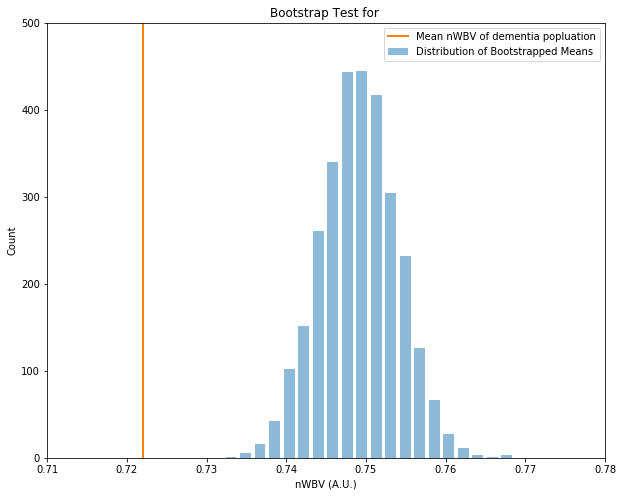

In [8]:
# Step 3: Bootstrapping

# mean nWBV of the entire population
print("Mean nWBV for the entire population: %.3f" % (data["nWBV"].mean()))

# Subsample population data
n_iter = 3000
n_samples = dementia_data.shape[0]
bootstrap_means = np.zeros([n_iter,])
for i in range(n_iter):
    # pull random sample
    sample_idx = np.random.choice(a=np.arange(0, data.shape[0]), size=n_samples, replace=True)
    bootstrap_means[i] = data["nWBV"].values[sample_idx].mean()

# plot the bootstrap distribution
fig, ax = plt.subplots(1, figsize=(10,8))
ax.hist(bootstrap_means, rwidth=0.75, alpha=0.5, bins=20,
        label="Distribution of Bootstrapped Means")
ax.set_xlabel("nWBV (A.U.)")
ax.set_xlim([0.71, 0.78])
ax.set_ylabel("Count")
ax.set_ylim([0, 500])

# plot a vertical line showing the mean nWBV of the dementia population
ax.plot(np.array([1, 1])*dementia_data["nWBV"].mean(), [0, 500], lw=2, label = "Mean nWBV of dementia popluation")
ax.set_title("Bootstrap Test for ")
ax.legend()

# calculate the p-value of the boostrap test
p_value = (np.sum(bootstrap_means <= dementia_data["nWBV"].mean()) /n_iter) + 1/n_samples
# The p-value is calculated as the proportion of bootstrapped nWBV means that fall below the mean nWBV of the demented population. 
# We add 1/(sample size) to the p-value to account for uncertainty in the bootstrapping procedure. 
print("p-value of bootstrap test: %0.3f " % (p_value)) 